# Polynomial fit


__<div style="text-align: right"> EE787: Machine learning, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_

--2019-09-26 15:51:26--  https://jonghank.github.io/ee370/files/fit_data.csv
Resolving jonghank.github.io (jonghank.github.io)... 185.199.108.153, 185.199.109.153, 185.199.111.153, ...
Connecting to jonghank.github.io (jonghank.github.io)|185.199.108.153|:443... connected.


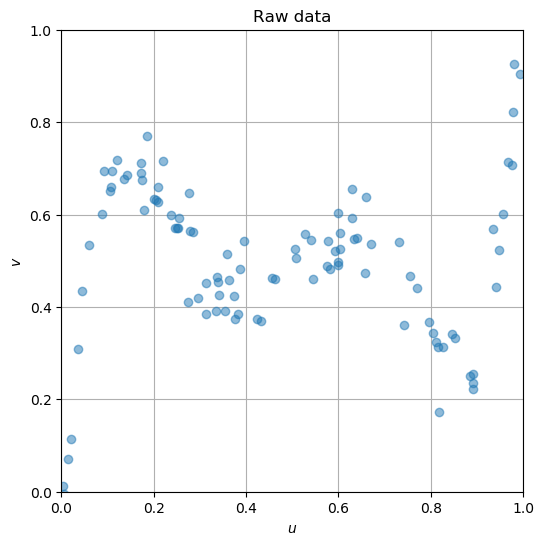

HTTP request sent, awaiting response... 200 OK
Length: 5001 (4.9K) [text/csv]
Saving to: ‘/tmp/julia1tCjI9’

     0K ....                                                  100% 39.0M=0s

2019-09-26 15:51:26 (39.0 MB/s) - ‘/tmp/julia1tCjI9’ saved [5001/5001]



In [1]:
using PyPlot
using CSV

########## load data

data = CSV.read(download("https://jonghank.github.io/ee370/files/fit_data.csv"))

u = data[:,1]
v = data[:,2]

figure(figsize=(6,6), dpi=100)
plot(u, v, "o", alpha=0.5)
grid()
axis("square")
xlim(0, 1)
ylim(0, 1)
xlabel(L"u")
ylabel(L"v")
title("Raw data")
show()

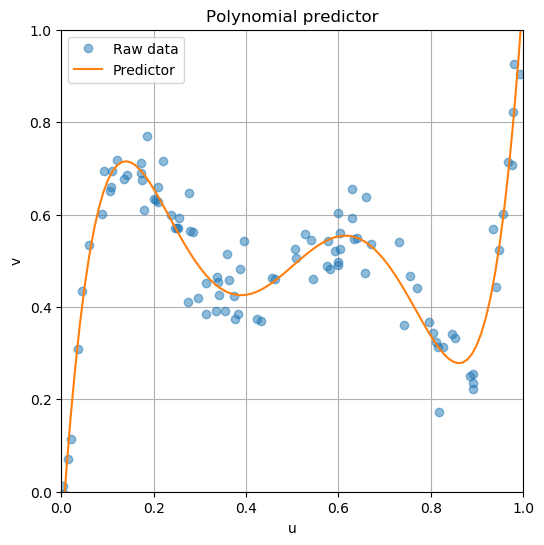

Optimal theta: [-0.10898, 15.1601, -94.8895, 239.591, -264.035, 105.363]


In [3]:
########## linear regression

n = length(u)
d = 6

X = zeros(n,d)
for i = 1:d
  X[:,i] = u.^(i-1)
end

y = v

theta_opt = X \ y

println("Optimal theta: $(theta_opt)")

vp = range(0, stop=1, length=100)

X_vp = zeros(length(vp),d)
for i = 1:d
  X_vp[:,i] = vp.^(i-1)
end

figure(figsize=(6,6), dpi=100)
plot(u, v, "o", alpha=0.5, label="Raw data")
plot(vp, X_vp*theta_opt, label="Predictor")
grid()
axis("square")
xlim(0, 1)
ylim(0, 1)
xlabel("u")
ylabel("v")
title("Polynomial predictor")
legend()
show()